In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_score,
    recall_score, roc_auc_score, roc_curve
)

In [4]:
data = pd.read_csv("C:/Users/joshi/Downloads/breast-cancer-wisconsin-data.csv")


In [8]:
import pandas as pd

df = pd.read_csv("C:/Users/joshi/Downloads/breast-cancer-wisconsin-data.csv")

if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
print("Columns:", df.columns)


Columns: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [10]:

for col in df.select_dtypes(include='object').columns:
    if col != 'diagnosis':
        df[col] = pd.to_numeric(df[col])



Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC Score: 0.99737962659679


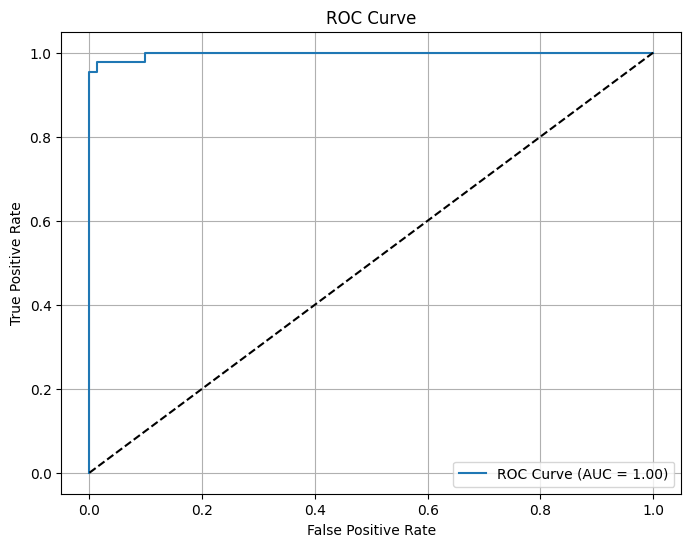

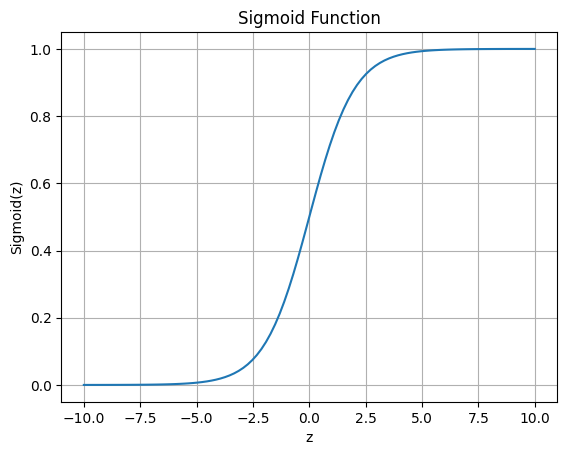


Custom Threshold = 0.4
New Confusion Matrix:
 [[70  1]
 [ 1 42]]
New Precision: 0.9767441860465116
New Recall: 0.9767441860465116


In [14]:

if 'diagnosis' in df.columns:
    y = df['diagnosis'].map({'M': 1, 'B': 0})
    X = df.drop('diagnosis', axis=1)
elif 'Class' in df.columns:
    y = df['Class']
    X = df.drop('Class', axis=1)
else:
    y = df.iloc[:, -1]
    X = df.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_vals = np.linspace(-10, 10, 100)
plt.plot(z_vals, sigmoid(z_vals))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()
threshold = 0.4
y_custom = (y_proba >= threshold).astype(int)
print(f"\nCustom Threshold = {threshold}")
print("New Confusion Matrix:\n", confusion_matrix(y_test, y_custom))
print("New Precision:", precision_score(y_test, y_custom))
print("New Recall:", recall_score(y_test, y_custom))